# DOMAIN: Banking and finance
- **CONTEXT:** A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee
majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the
borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an
average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing
department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit
with same budget as per last campaign.<br>
<br>

- **DATA DESCRIPTION:** The data consists of the following attributes:<br>
 1. ID: Customer ID
 2. Age Customer’s approximate age.
 3. CustomerSince: Customer of the bank since. [unit is masked]
 4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
 5. ZipCode: Customer’s zip code.
 6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
 7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
 8. Level: A level associated to the customer which is masked by the bank as an IP.
 9. Mortgage: Customer’s mortgage. [unit is masked]
 10. Security: Customer’s security asset with the bank. [unit is masked]
 11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
 12. InternetBanking: if the customer uses internet banking.
 13. CreditCard: if the customer uses bank’s credit card.
 14. LoanOnCard: if the customer has a loan on credit card.
 <br>

# 1. Import the necessary Libraries and warehouse data:

In [1]:
#Import the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as stats
%matplotlib inline

import warnings as wn
wn.filterwarnings('ignore')

### i. Load all data and merge all the data into a single data frame

In [2]:
# Load the Part2 - Data1.csv data file
df1 = pd.read_csv('./Part2 - Data1.csv')

In [3]:
#Before merging the data into single data frame cross check if the data have same attributes or not
#data frame 1
print(df1.shape)
df1.head()

(5000, 8)


,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [4]:
# Load the Part2 - Data2.csv data file
df2 = pd.read_csv('./Part2 -Data2.csv')

In [5]:
#Before merging the data into single data frame cross check if the data have same attributes or not
#data frame 1
print(df2.shape)
df2.head()

(5000, 7)


,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


#### Merge df1 and df2 to a single dataframe bank_data

In [6]:
#Merge the dataframe key as ID
bank_data = pd.merge(df1, df2, how="outer", on=["ID"])

#cross check the data after merging the the three dataframe
bank_data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


### ii.Check the Shape and Datatypes

In [7]:
#check the shape of the data
bank_data.shape

(5000, 14)

- **Dataframe contain 14 attributes and 5000 rows of data**

In [8]:
#check the datatypes of each attributes
bank_data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

**Details of each data type:**

- *All the data are number types no categorical data*
- **MonthlyAverageSpend** and **LoanOnCard** are float64 data type rest int64 type

In [9]:
#check the datatypes with extra information like if any rows have null data etc..
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


- **There are 20 missing values in LoanOnCard and rest of the attributes there is no missing values**

# 3. Data cleansing

### i.Check if any missing values

In [10]:
#check the missing value 
bank_data.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

- **LoanOnCard have 20 missing values and rest all attributs there is no missing values.**

### ii. Drop the missing values

In [11]:
##Drop the missing values
bank_data_n = bank_data.dropna(axis=0)

In [12]:
#check the missing value 
bank_data_n.isnull().sum()
print('Shape of dataframe after dropping missing values:',bank_data_n.shape)

Shape of dataframe after dropping missing values: (4980, 14)


- **20 Missing values rows data deleted from the dataframe**

## 4. Data analysis & visualisation:

### i.  5 Point summary of numerical attributes

**The five number summary helps describe the center, spread and shape of data. The five pointssummary are as follows:**
* Minimum
* Q1 - First Quartile(25%)
* Q2 - Econd Quartile (Median- 50%)
* Q3 - Third Quartile (75%)
* Maximum

In [13]:
#check the 5 point summary and other data distribution infromation
bank_data_n.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
ID,4980.0,2510.345382,1438.011129,10.0,1265.75,2510.5,3755.250,5000.0
Age,4980.0,45.352610,11.464212,23.0,35.00,45.0,55.000,67.0
CustomerSince,4980.0,20.117671,11.468716,-3.0,10.00,20.0,30.000,43.0
HighestSpend,4980.0,73.852410,46.070090,8.0,39.00,64.0,98.000,224.0
ZipCode,4980.0,93152.420482,2123.660073,9307.0,91911.00,93407.0,94608.000,96651.0
HiddenScore,4980.0,2.395582,1.147200,1.0,1.00,2.0,3.000,4.0
MonthlyAverageSpend,4980.0,1.939536,1.750006,0.0,0.70,1.5,2.525,10.0
Level,4980.0,1.880924,0.840144,1.0,1.00,2.0,3.000,3.0
Mortgage,4980.0,56.589759,101.836758,0.0,0.00,0.0,101.000,635.0
Security,4980.0,0.104418,0.305832,0.0,0.00,0.0,0.000,1.0


### Observation:
#### Cutomer relationships with bank with respect to  differnet attributes: 

<b>Age</b> :  minumum age is 23, average is 45.3 and maximum age is 67. Data looks uniformly distributed

<b>CustomerSince</b>: 

a) minumum **CustomerSince is having negative values**.<br>
b) Maxinum no.of yr/months of customer relationship with bank is 43<br>
e) Average yr/months of customer relationship with bank is nearly 20.11 years<br>
            
<b>HighestSpend</b>: 

Customers HighestSpend: 224, mininum is: 8 , average is : 73.7

<b>HiddenScore</b>: customer HiddenScore is 4 and mininum is 1

<b>Mortgage</b>: 

customers having max value of house mortgage is 635,  minumumn having  0 indicates no mortgage, average is 56.4

**LoanOnCard, CreditCard, InternetBanking, Security, FixedDepositAccount have either 0 or 1 values**

**From 5 point summary also it indicates:**<br>

**Categorical Feature:**
- HiddenScore
- Level
- Security
- FixedDepositAccount
- InternetBanking
- CreditCard
- ZipCode
- LoanOnCard

**Numerical feature:**
- Age
- CustomerSince
- HighestSpend
- MonthlyAverageSpend
- Mortgage

### ii. Replace the CustomerSince negative values with median

In [14]:
## Get the negative value counts
bank_data_n[bank_data_n < 0].count()

ID                      0
Age                     0
CustomerSince          51
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard              0
dtype: int64

- **Total 51 negative values present in CustomerSince column**

In [15]:
##Replace negative values with Median
custsn_median = bank_data_n['CustomerSince'].median()
bank_data_n[bank_data_n < 0] = custsn_median

In [16]:
#cross check if there is any negative remaining
bank_data_n[bank_data_n < 0].count()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

- **Now no negative values in data set**

### iii. Univariate Analysis of the continuous variables

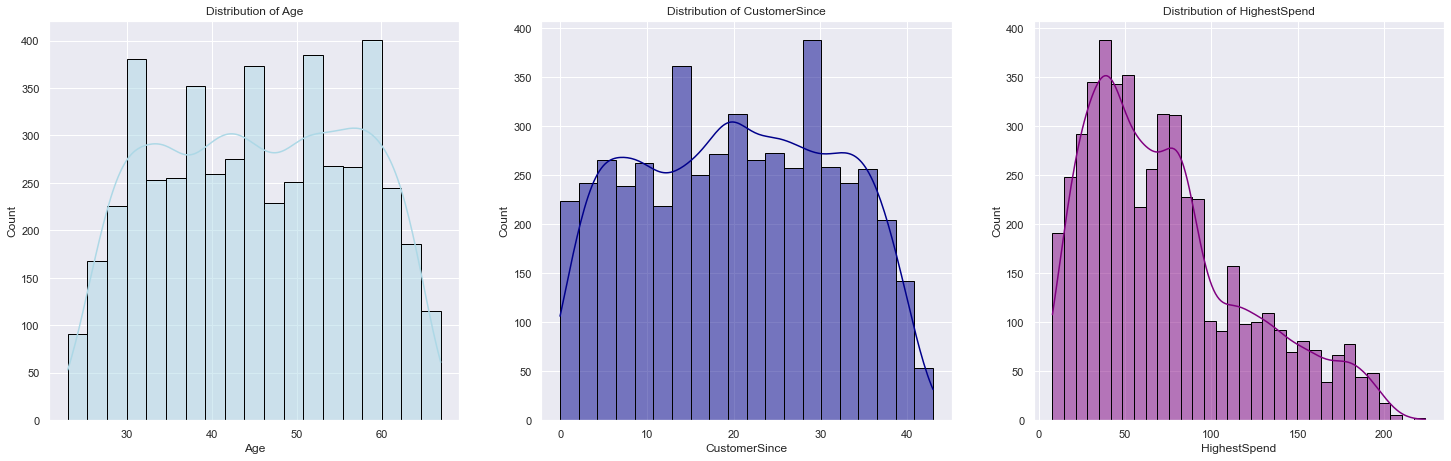

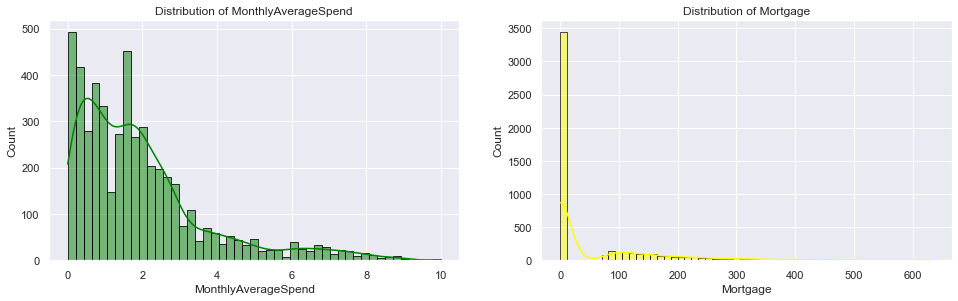

In [17]:
# check the frequency distribution of the predictor attributes
plt.figure(figsize=(25, 25))
plt.subplot(3, 3, 1)
plt.title('Distribution of Age')
sns.histplot(bank_data_n.Age, kde= True, color='lightblue', edgecolor = 'black');

plt.subplot(3, 3, 2)
plt.title('Distribution of CustomerSince')
sns.histplot(bank_data_n.CustomerSince, kde= True, color='darkblue', edgecolor = 'black');

plt.subplot(3, 3, 3)
plt.title('Distribution of HighestSpend')
sns.histplot(bank_data_n.HighestSpend, kde= True, color='purple', edgecolor = 'black');

plt.figure(figsize=(25, 15))
plt.subplot(3, 3, 1)
plt.title('Distribution of MonthlyAverageSpend')
sns.histplot(bank_data_n.MonthlyAverageSpend, kde= True, color='green', edgecolor = 'black');

plt.subplot(3, 3, 2)
plt.title('Distribution of Mortgage')
sns.histplot(bank_data_n.Mortgage, kde= True, color='yellow', edgecolor = 'black');

### Observation

- Age and CustomerSince is normally distributed with few pick value.
- HighestSpend is right skewed. High no.of customer spent between 10 to 100 (Lets think its in 10k to 100k dollar).
- MonthlyAverageSpend is right skewed. High no.of customer with Monthly Average Spend between 0 to 3K.
- Mortgage is right skewed and high no.of customer with Mortgage less than approximatly 40K.

### Checking the presence Skewness

In [18]:
# Checking for Skewness of data
import scipy.stats as stats
Skewness = pd.DataFrame({'Skewness' : [stats.skew(bank_data_n.Age),
                                       stats.skew(bank_data_n.CustomerSince),
                                       stats.skew(bank_data_n.MonthlyAverageSpend),
                                       stats.skew(bank_data_n.Mortgage)
                                      ,stats.skew(bank_data_n.Mortgage)]}, 
                        index=['Age','CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage'])

#print skewness data
Skewness

,Skewness
Age,-0.030784
CustomerSince,-0.015788
HighestSpend,1.595521
MonthlyAverageSpend,2.101397
Mortgage,2.101397


### Observation:
- Age and CustomerSince seems to be Symmetrical.
- HighestSpend, MonthlyAverageSpend and Mortgage are Right Skewed, as they are highly skewed there will be quiet lot of extreme outliers.

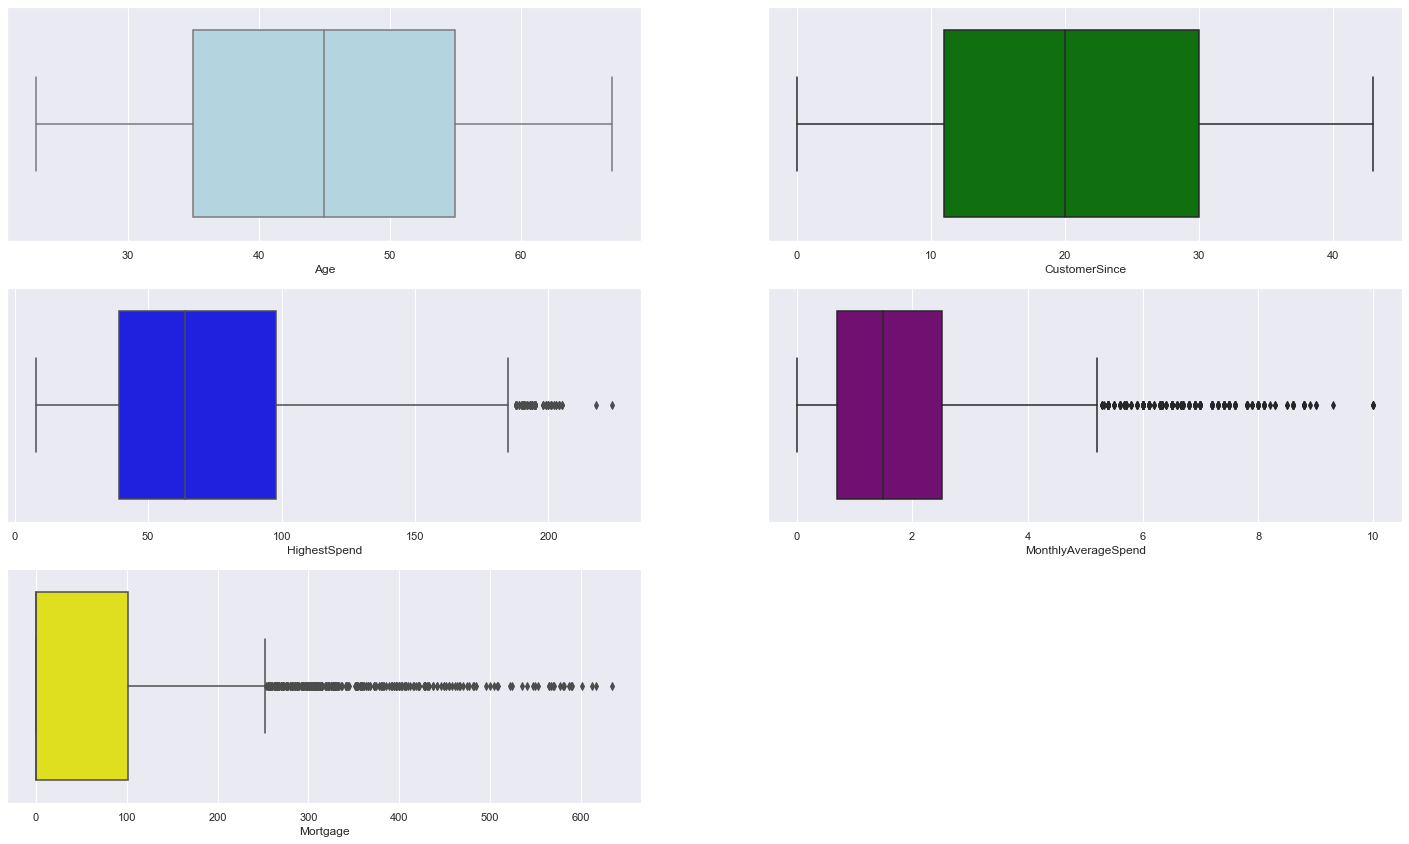

In [19]:
#check the outlier using Box plots
plt.figure(figsize=(25, 25))
plt.subplot(5, 2, 1)
sns.boxplot(x=bank_data_n.Age, color='lightblue')

plt.subplot(5, 2, 2)
sns.boxplot(x=bank_data_n.CustomerSince, color='green')

plt.subplot(5, 2, 3)
sns.boxplot(x=bank_data_n.HighestSpend, color='blue')

plt.subplot(5, 2, 4)
sns.boxplot(x=bank_data_n.MonthlyAverageSpend, color='purple' )

plt.subplot(5, 2, 5)
sns.boxplot(x=bank_data_n.Mortgage, color='yellow' );


## Inference

1. Age feature is normally distributed with majority of customers falling between 35 years and 55 years of age. We can infer from the boxplot above, and also in info attained from describe() shows mean is almost equal to median.

2. CustomerSince is normally distributed with more customer belongs to 11 years to 30 Years. Here also the mean is approximately equal to median.

3. HighestSpend is Right skewed. Majority of the customers have income between 45k and 55k. We can confirm this by saying the mean is greater than the median.

4. MonthlyAverageSpend is also a Right skewed and average spending is between 0 to 10 and majority spends less than 2.5. Also have more outliers.

5. Mortgage 70% of the individuals have a mortgage of less than 40. However the max value is 635.

### iv. Univariate Analysis of the categorical in nature variables

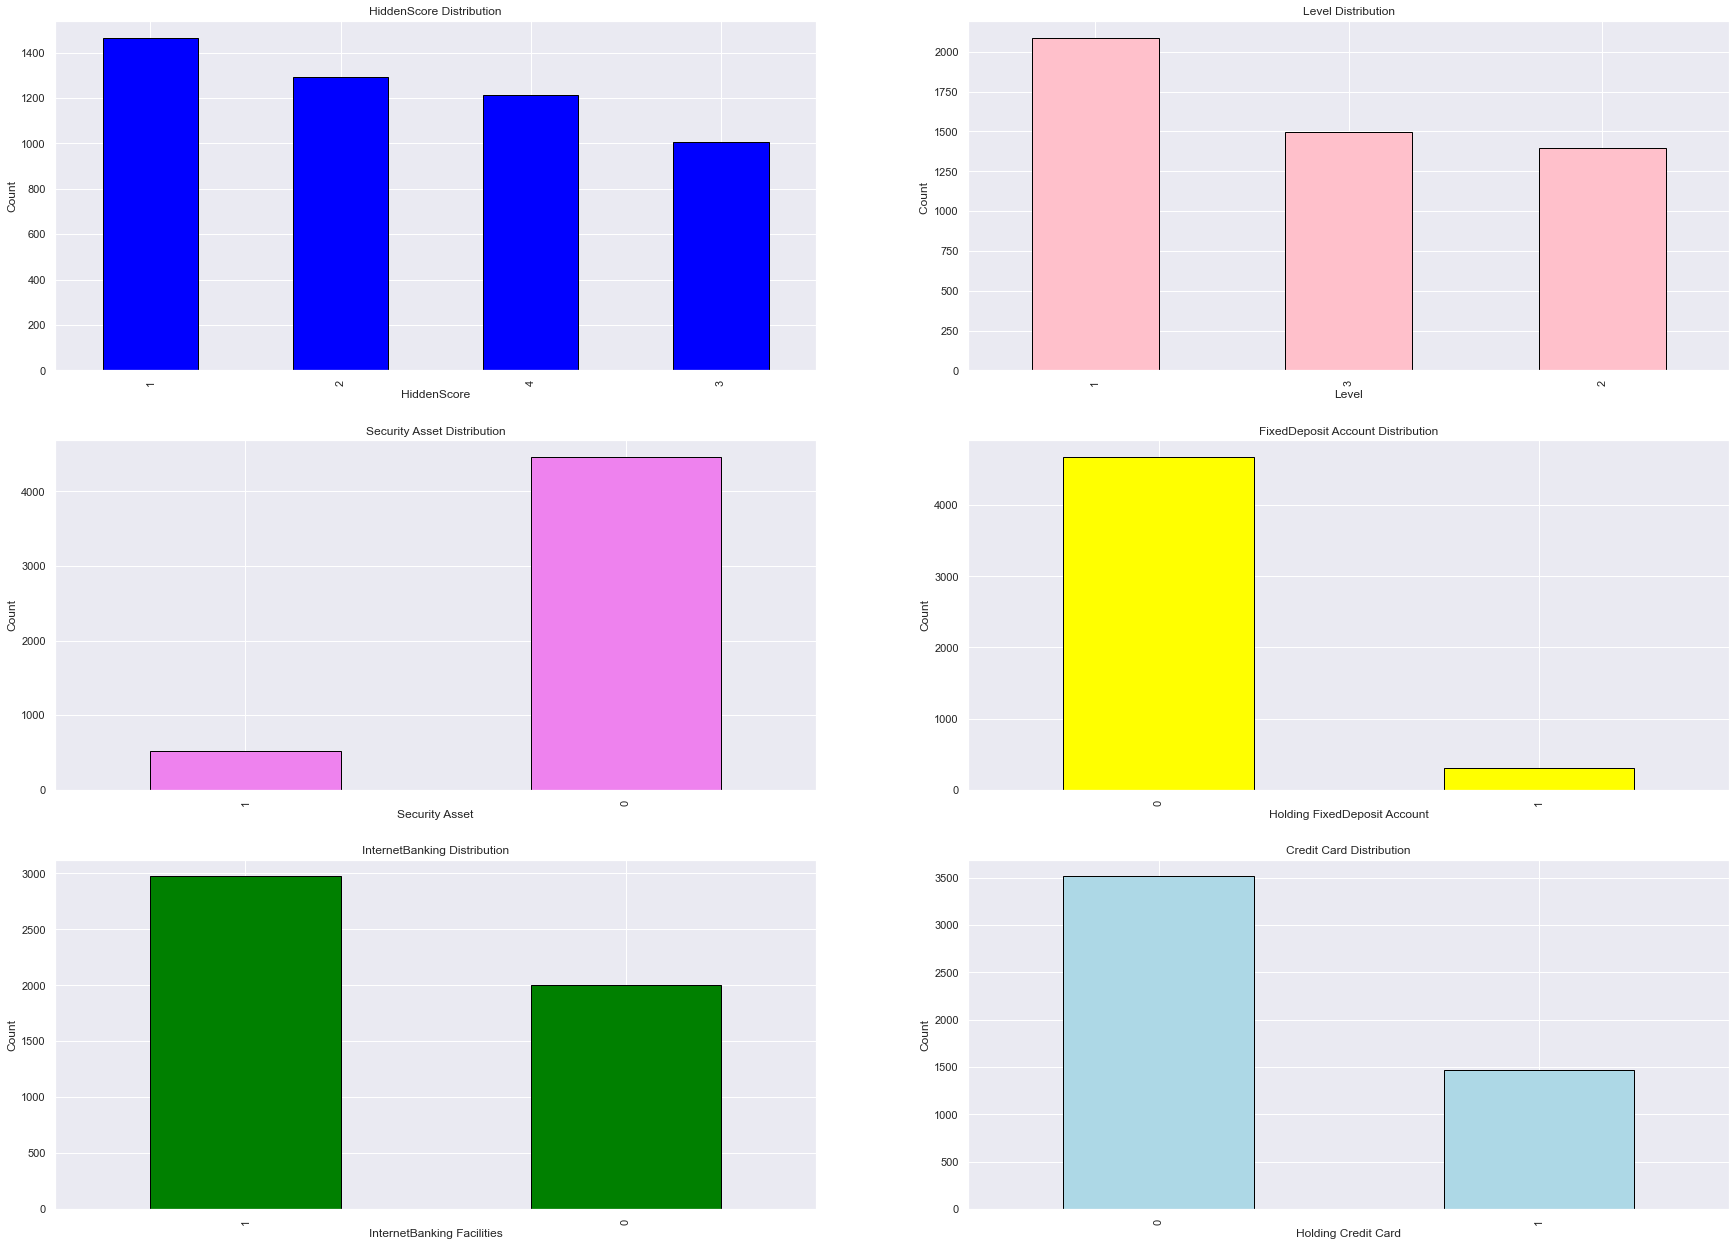

In [20]:
#Frequency distribution for categorical variables 
plt.figure(figsize=(30,45))
plt.subplot(6,2,1)
bank_data_n['HiddenScore'].value_counts().plot(kind="bar", align='center',color = 'blue',edgecolor = 'black')
plt.xlabel("HiddenScore")
plt.ylabel("Count")
plt.title("HiddenScore Distribution")


plt.subplot(6,2,2)
bank_data_n['Level'].value_counts().plot(kind="bar", align='center',color = 'pink',edgecolor = 'black')
plt.xlabel('Level')
plt.ylabel('Count ')
plt.title('Level Distribution')


plt.subplot(6,2,3)
bank_data_n['Security'].value_counts().sort_values().plot(kind="bar", align='center',color = 'violet',edgecolor = 'black')
plt.xlabel('Security Asset')
plt.ylabel('Count')
plt.title('Security Asset Distribution')


plt.subplot(6,2,4)
bank_data_n['FixedDepositAccount'].value_counts().plot(kind="bar", align='center',color = 'yellow',edgecolor = 'black')
plt.xlabel('Holding FixedDeposit Account')
plt.ylabel('Count')
plt.title("FixedDeposit Account Distribution")


plt.subplot(6,2,5)
bank_data_n['InternetBanking'].value_counts().plot(kind="bar", align='center',color = 'green',edgecolor = 'black')
plt.xlabel('InternetBanking Facilities')
plt.ylabel('Count')
plt.title("InternetBanking Distribution")


plt.subplot(6,2,6)
bank_data_n['CreditCard'].value_counts().plot(kind="bar", align='center',color = 'lightblue',edgecolor = 'black')
plt.xlabel('Holding Credit Card')
plt.ylabel('Count')
plt.title("Credit Card Distribution");


## Observations

- The variables and Level are ordinal variables. The distribution of HiddenScore is nearly evenly distributed.
- It seems that many of the Customer is not holding Security Asset and Fixed Deposit Account, have vast difference is visible.
- Arround 60% customer have Internet Banking and 40% dont have Internet Banking.
- Arround 70% Customer not Holding Credit Card and 30% holding creditcard.

### v.Checking for correlation

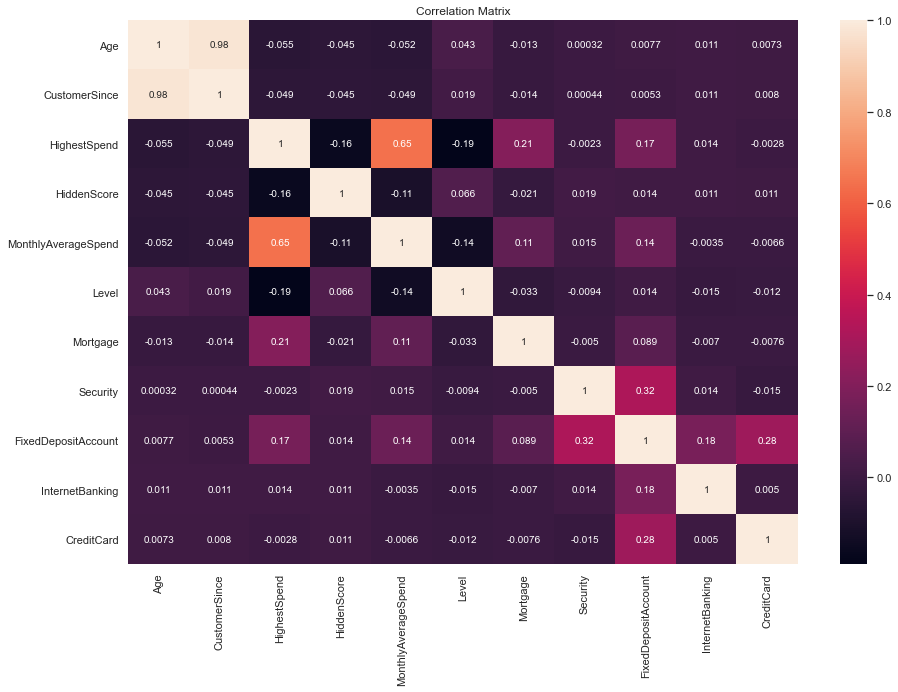

In [21]:
#check the co-rrelation matrix
crr = bank_data_n[['Age', 'CustomerSince', 'HighestSpend','HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard']].corr()

##plot heatmap
plt.figure(figsize=(15,10))
plt.title('Correlation Matrix')
sns.heatmap(crr, annot = True);

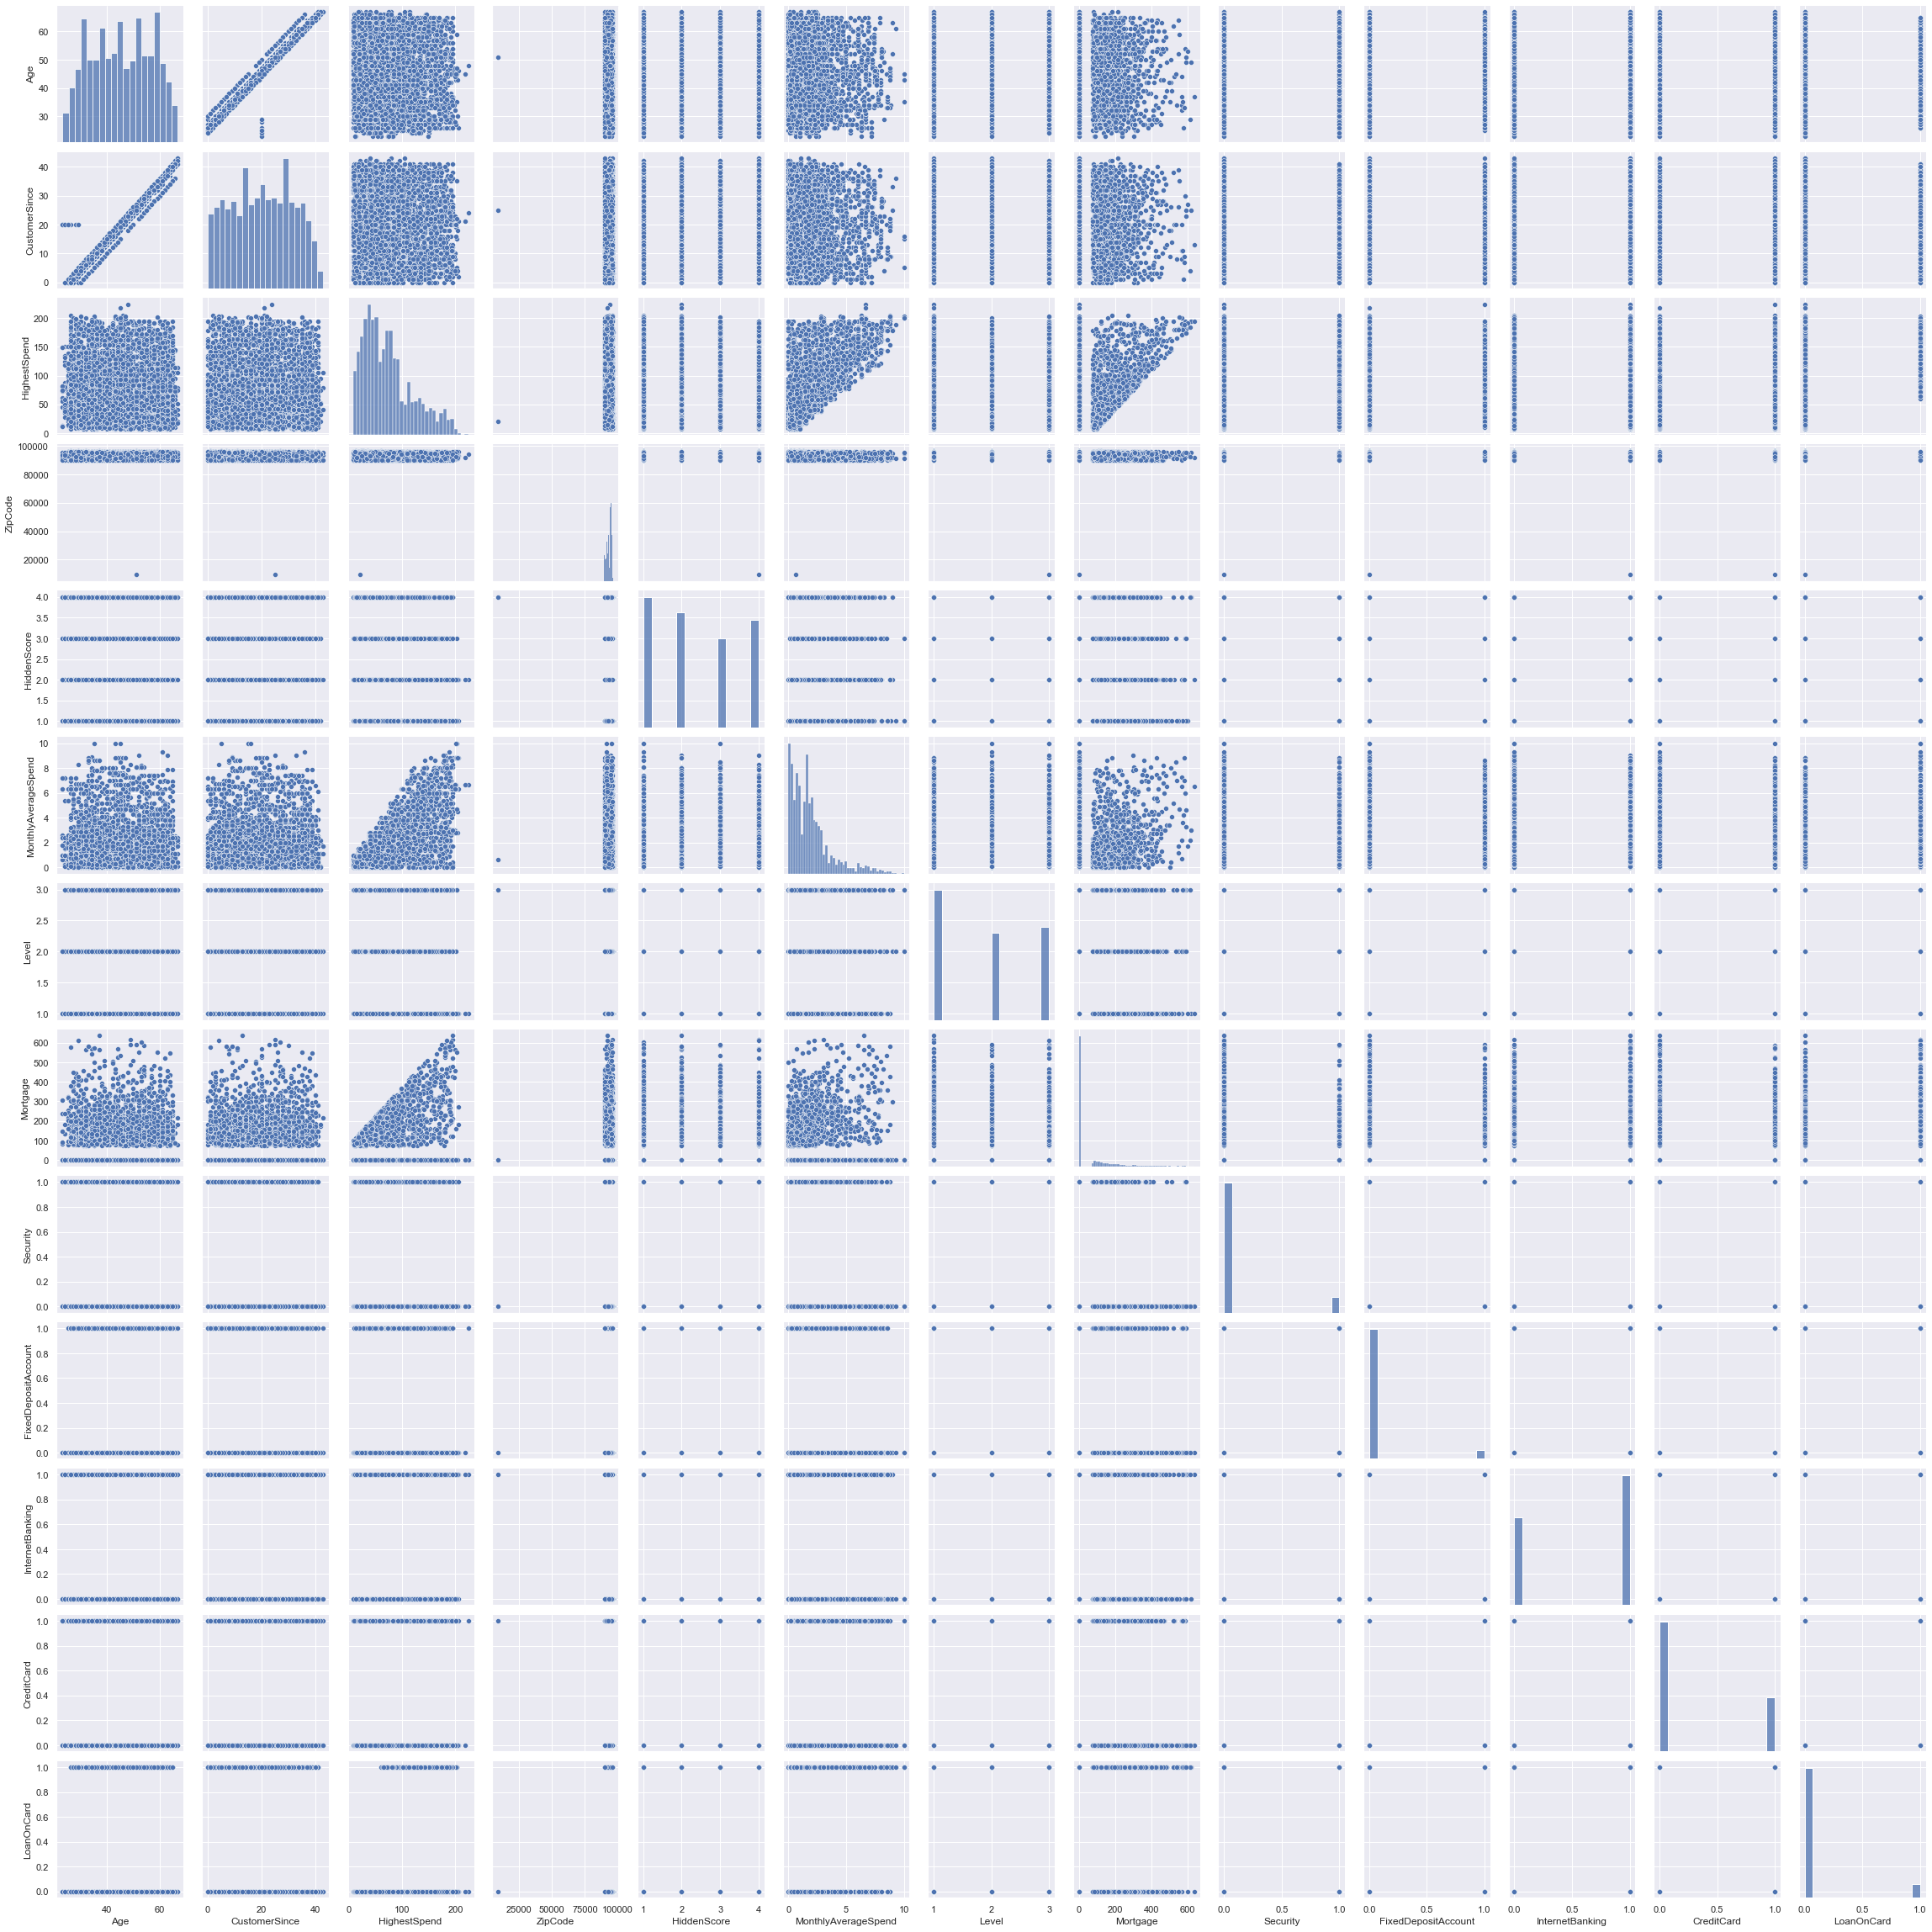

In [22]:
#Pairplot
sns.pairplot(bank_data_n.iloc[:,1:]);

### Observarion Of Correlation Matrix and Pair Plot:
- Age and CustomerSince is highly co-related.
- HighestSpend and MonthlyAverageSpend have correlation too.

### vi.Target variable analysis

In [23]:
bank_data_n["LoanOnCard"].value_counts().to_frame()

,LoanOnCard
0.0,4500
1.0,480


   LoanOnCard
0        4500
1         480


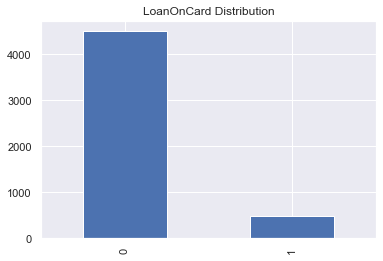

In [24]:
##Change LoanOnCard into interger type
bank_data_n['LoanOnCard'] = bank_data_n['LoanOnCard'].apply(np.int64)
print(bank_data_n["LoanOnCard"].value_counts().to_frame())

#plot distribution
plt.title('LoanOnCard Distribution')
pd.value_counts(bank_data_n['LoanOnCard']).plot(kind='bar');

### Observarion
- Arround 90% customer don't have loan on cart and 10% customer have loan on card.
- The smaple size for class 1 is lesss compare to '0'. But undersampling and oversampling part of module 3. 

## Balance the targent class

### Random Over-Sampling Method
- Oversampling can be defined as adding more copies to the minority class

In [63]:
#keep backup of original data
bank_data_n1 = bank_data_n.copy()

In [64]:
# class count
class_count_0, class_count_1 = bank_data_n['LoanOnCard'].value_counts()
print('class_count_0:', class_count_0, '\nclass_count_1:',class_count_1)

# Separate class
class_0 = bank_data_n[bank_data_n['LoanOnCard'] == 0]
class_1 = bank_data_n[bank_data_n['LoanOnCard'] == 1]

print('\nclass_0 shape:', class_0.shape, ' \nclass_1 shape:', class_1.shape)

class_count_0: 4500 
class_count_1: 480

class_0 shape: (4500, 14)  
class_1 shape: (480, 14)


In [75]:
class_1_over = class_1.sample(class_count_0, replace=True)
bank_data_n = pd.concat([class_1_over, class_0], axis=0)

In [78]:
#extra record added to do over sampling
bank_data_n.shape

(9000, 14)

In [85]:
#check the count of the data after sampling
count_0_class_after, count_1_class_after = bank_data_n['LoanOnCard'].value_counts()
print('Data after oversampling:\n Class_0:', count_0_class_after, '\n Class_1:', count_1_class_after)

Data after oversampling:
 Class_0: 4500 
 Class_1: 4500


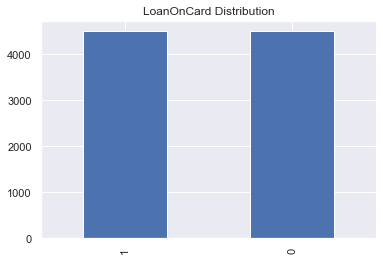

In [86]:
plt.title('LoanOnCard Distribution')
pd.value_counts(bank_data_n['LoanOnCard']).plot(kind='bar');

### vii.Influence of other attributes on 'LoanOnCard' (Target Class)

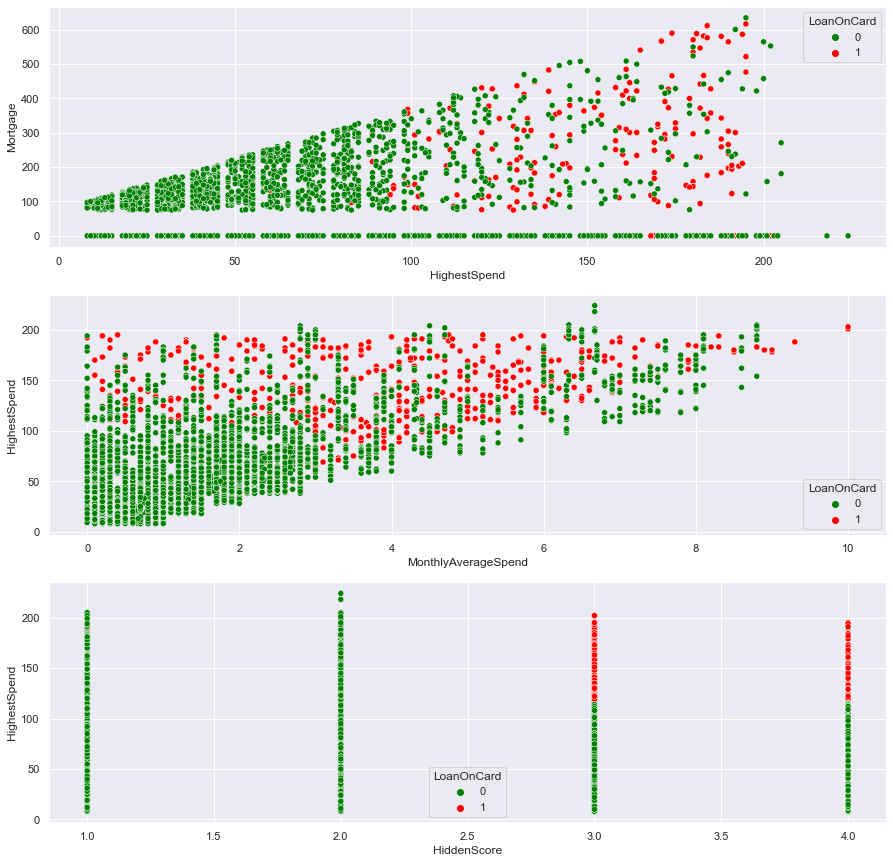

In [79]:
#HighestSpend and Mortgage influence to Loan on card
plt.figure(figsize=(15, 15))
plt.subplot(3, 1, 1)
sns.scatterplot(x=bank_data_n.HighestSpend, y=bank_data_n.Mortgage, hue=bank_data_n.LoanOnCard, palette= ['green','red'])

#MonthlyAverageSpend and HighestSpend influence to Loan on card
plt.subplot(3, 1, 2)
sns.scatterplot(x=bank_data_n.MonthlyAverageSpend, y=bank_data_n.HighestSpend, hue=bank_data_n.LoanOnCard, palette= ['green','red'])

#HiddenScore and HighestSpend influence to Loan on card
plt.subplot(3, 1, 3)
sns.scatterplot(x=bank_data_n.HiddenScore, y=bank_data_n.HighestSpend, hue=bank_data_n.LoanOnCard, palette= ['green','red']);

### Observarion

- Customer have LoanOnCard there a MonthlyAverageSpend more.
- Customer whose HiddenScore is >= 3, they have more Loan On Card.
- It is very precise that as the income increases (approximately more than 100) the mortgage value also increases gradually wiht the necessity for Loan On Card.

<AxesSubplot:xlabel='HiddenScore', ylabel='Mortgage'>

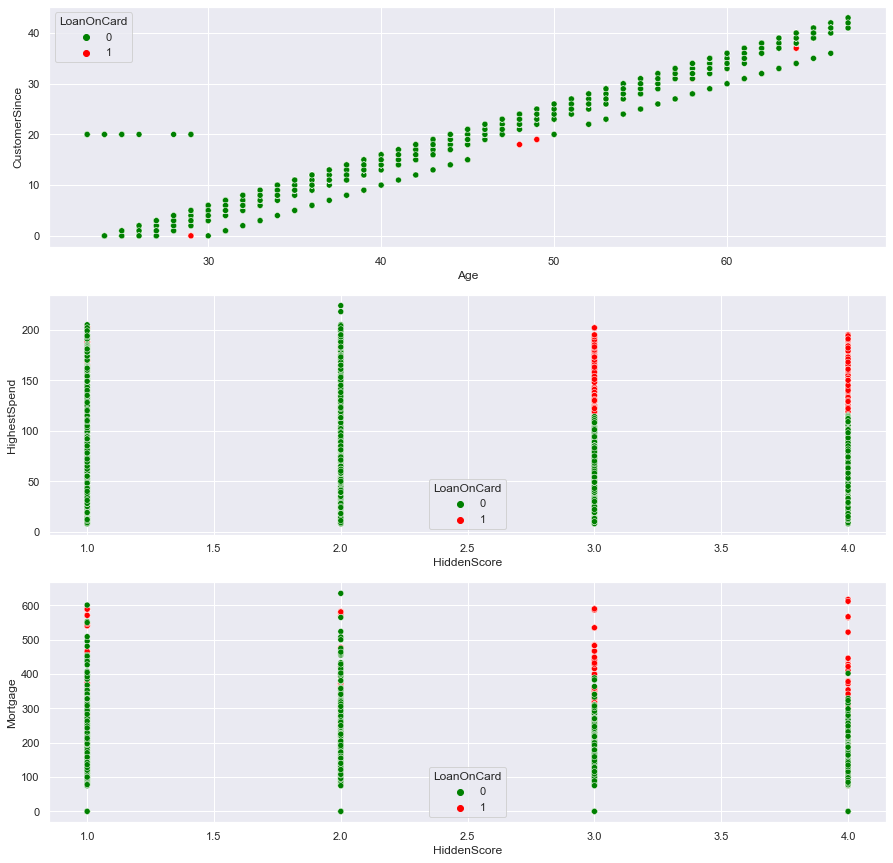

In [80]:
#Age and Mortgage CustomerSince to Loan on card
plt.figure(figsize=(15, 15))
plt.subplot(3, 1, 1)
sns.scatterplot(x=bank_data_n.Age, y=bank_data_n.CustomerSince, hue=bank_data_n.LoanOnCard, palette= ['green','red'])

#HiddenScore and HighestSpend CustomerSince to Loan on card
plt.subplot(3, 1, 2)
sns.scatterplot(x=bank_data_n.HiddenScore, y=bank_data_n.HighestSpend, hue=bank_data_n.LoanOnCard, palette= ['green','red'])

#HiddenScore and Mortgage CustomerSince to Loan on card
plt.subplot(3, 1, 3)
sns.scatterplot(x=bank_data_n.HiddenScore, y=bank_data_n.Mortgage, hue=bank_data_n.LoanOnCard, palette= ['green','red'])

### Observation

- Age have stron co-relation with Customer Since and there is no influence on Loan On Card.
- If seem like customer with Hidden score 1 and 2 have very less Loan On Card.
- Customer with Hidden Score 3 and 4 have taken more Loan on Card.
- Customer with Hidden Score 3 and 4 have high Mortgage compare to customer with Hidden Score 1 and 2.

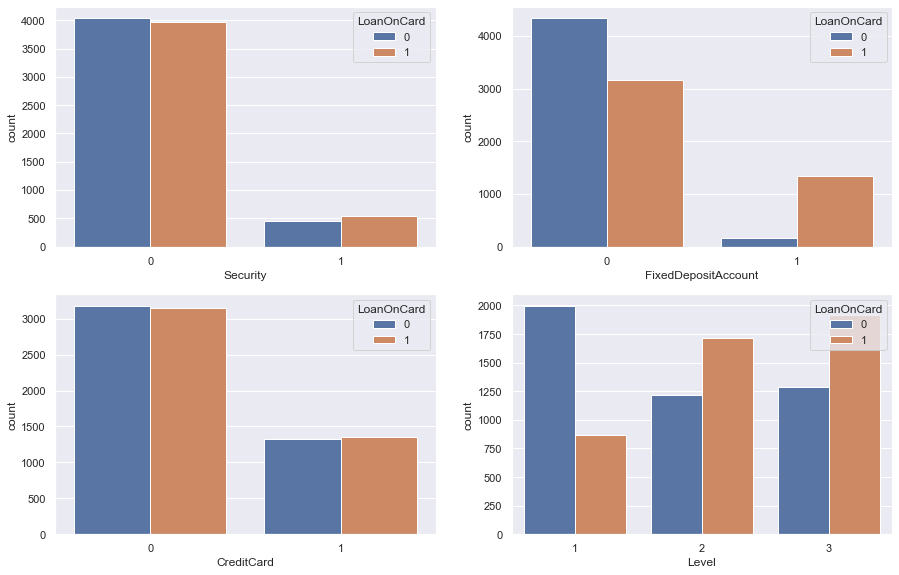

In [81]:
##Relation of categorical varibble with Loan on Card
plt.figure(figsize=(15,15))

# Securiry Relationship wity Loan on Card
plt.subplot(3,2,1)
sns.countplot(x="Security", data=bank_data_n ,hue="LoanOnCard")

# FixedDepositAccount Relationship wity Loan on Card
plt.subplot(3,2,2)
sns.countplot(x='FixedDepositAccount' ,data=bank_data_n ,hue='LoanOnCard')

# CreditCard Relationship wity Loan on Card
plt.subplot(3,2,3)
sns.countplot(x='CreditCard' ,data=bank_data_n ,hue='LoanOnCard')

# Level Relationship wity Loan on Card
plt.subplot(3,2,4)
sns.countplot(x='Level' ,data=bank_data_n ,hue='LoanOnCard');

### Observation

- Customer who have Security Account very few have Loan On Card.
- Most of customer with Fixed Deposit Account have Loan on Card.
- Customer Level 2 and 3 took loan on card little higher compare to Level 1.

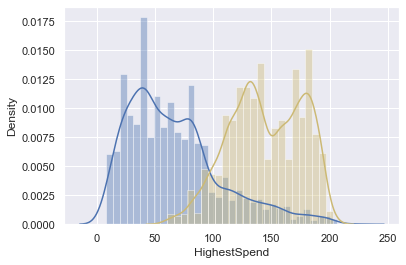

In [82]:
sns.distplot(bank_data_n[bank_data_n["LoanOnCard"] == 0]['HighestSpend'], color = 'b');
sns.distplot(bank_data_n[bank_data_n["LoanOnCard"] == 1]['HighestSpend'], color = 'y');

### Observation
- Customer have Loan on Card also have Highest Spending.

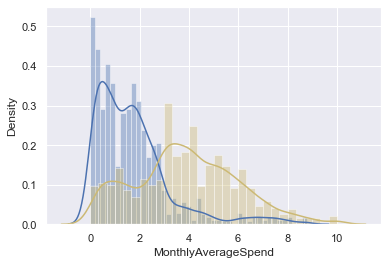

In [83]:
sns.distplot(bank_data_n[bank_data_n["LoanOnCard"] == 0]['MonthlyAverageSpend'], color = 'b');
sns.distplot(bank_data_n[bank_data_n["LoanOnCard"] == 1]['MonthlyAverageSpend'], color = 'y');

### Observation

- Customer with Monthly Avg Spend is high have Loan on card less compare to those have Monthly Avg Spend in Low.

<AxesSubplot:>

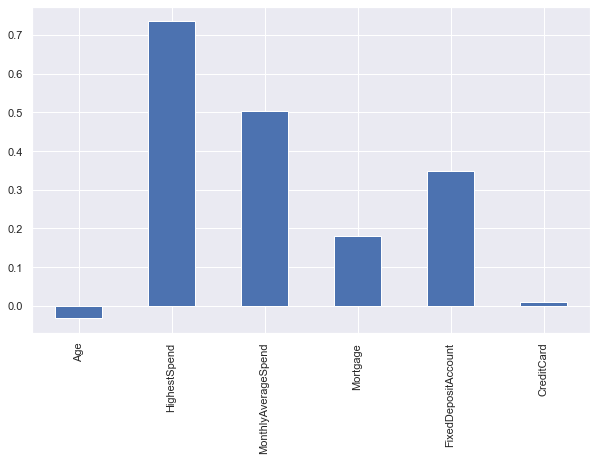

In [84]:
#HighestSpend, MonthlyAverageSpend, MonthlyAverageSpend, Age correlation with Dependant variable LoanOnCard
plt.figure(figsize=(10,6))
bank_data_n[[ 'LoanOnCard','Age', 'HighestSpend', 'MonthlyAverageSpend',
             'Mortgage', 'FixedDepositAccount', 'CreditCard']].corr()['LoanOnCard'][1:].plot.bar()

### Observation
- The above diagram shows a correlation between the independant variable and dependant variables, we see that 'HighestSpend','FixedDepositAccount' and 'MonthlyAverageSpend' has some correlation with 'LoanOnCard'.

# 4. Data pre-processing:

### i. Split the dataset into training and test

In [87]:
#import sciket learn package
from sklearn.model_selection import train_test_split

#since ID is like customer number will not add value in prediction.
#CustomerSince is highly co-rrelated with Age.
#So drop these column for the independent(predictors) data set.
X = bank_data_n.drop(['ID', 'CustomerSince', 'LoanOnCard'], axis= 1)
y = np.array(bank_data_n['LoanOnCard'])

#Split the data into training and test set [70% training and 30% for test]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

- Splited the data into 70% for training and 30% for testing.

# 5. Model training, testing and tuning:

## Model -1: Logistic Regression

In [89]:
# import the Sciket learn package for modeling
from sklearn.linear_model import LogisticRegression

#Create object of LogisticRegression model class
logmodel = LogisticRegression()

#Fit the model with taining data
logmodel.fit(X_train, y_train)


LogisticRegression()

### i. Performance of the model with Training and Testing data

In [90]:
#check the model training score
train_score = logmodel.score(X_train, y_train)
print('Model Training score:',train_score);

Model Training score: 0.8785714285714286


In [91]:
#Predict for test set
y_pred = logmodel.predict(X_test)

In [92]:
#check the test scrore
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#check the test Accuracy
test_score = accuracy_score(y_test, y_pred)
print('Model Test score:',test_score);

Model Test score: 0.8703703703703703


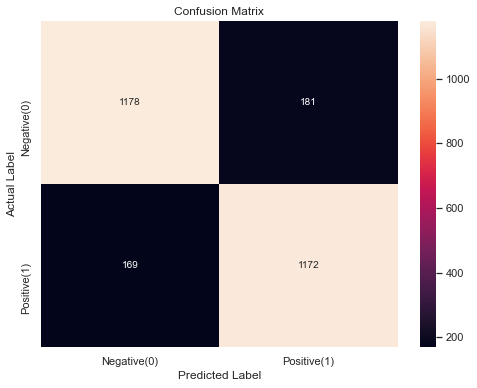

In [93]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_label = ["Negative(0)", "Positive(1)"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)

#plot the graph
plt.figure(figsize=(8,6))
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [94]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1359
           1       0.87      0.87      0.87      1341

    accuracy                           0.87      2700
   macro avg       0.87      0.87      0.87      2700
weighted avg       0.87      0.87      0.87      2700



### Observation:
- With Logistic Regression Model prediction score for train and test is nearly 92%.
- Since both train the test score nearly 92%, we can assume the model will give good inference with future data set.
- Model score is good but Recall for LoaOnCard(perople already taken loan on card) is little less. Also from confusion matrix indicates False Negative Ratio is High. But overall accuracy is high if we consider both TN and TP.

## ii. ROC curve

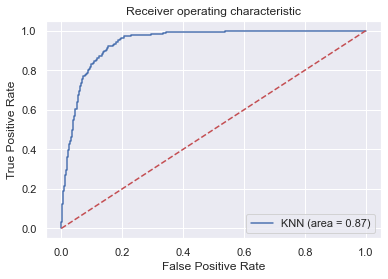

In [96]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

- The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

# Model -2: Naive Bayes

In [97]:
#Import the Model package
from sklearn.naive_bayes import GaussianNB

#Create the object of GaussianNB
naive_model = GaussianNB()

#Fit/train the model with 70% training and 30% testing data
naive_model.fit(X_train, y_train)

GaussianNB()

## Performance of Train and Test data

In [98]:
#check the model training score
train_score_naiv = naive_model.score(X_train, y_train)
print('Model Training Scroe', train_score_naiv)

Model Training Scroe 0.8268253968253968


In [99]:
#Check the test score
y_pred1 = naive_model.predict(X_test)
test_score_naiv = accuracy_score(y_test, y_pred1)
print('Model Testing Score', test_score_naiv)

Model Testing Score 0.832962962962963


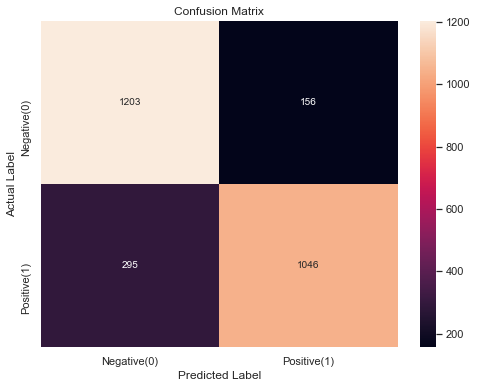

In [100]:
#Confusion Matrix
cm_naiv = confusion_matrix(y_test, y_pred1)
class_label = ["Negative(0)", "Positive(1)"]
df_naiv_cm = pd.DataFrame(cm_naiv, index = class_label, columns = class_label)

#plot the graph
plt.figure(figsize=(8,6))
sns.heatmap(df_naiv_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [101]:
# Classififcation Report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1359
           1       0.87      0.78      0.82      1341

    accuracy                           0.83      2700
   macro avg       0.84      0.83      0.83      2700
weighted avg       0.84      0.83      0.83      2700



### Observation:
-  Naibe Bayes prediction is good but compare to logistic regression is little less.
- Recall overall socre is nearly same for both of the model.

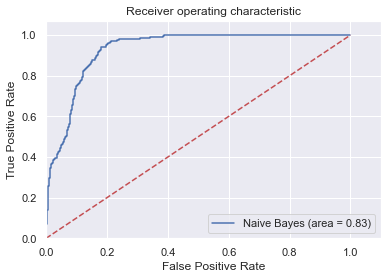

In [102]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

naive_roc_auc = roc_auc_score(y_test, naive_model.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, naive_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % naive_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.07])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

- 77% area covered covered under curve. Conside as model performing good but not so good.

## Model Comparison

LR: 0.845889 (0.014264)
NB: 0.818667 (0.056417)


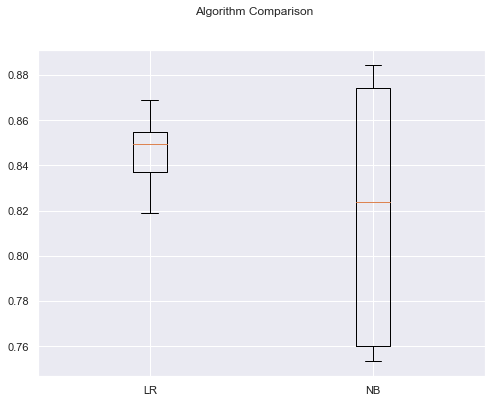

In [103]:
from sklearn.model_selection import KFold, cross_val_score
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=1234)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure(figsize=(8,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

- From mdoel comparision it indicates Logistic Regression accuracy score is better than Naive Bayes.

## 6. Conclusion and improvisation:
The aim of the Bank is to convert there liability customers into loan customers.
They want to set up a new marketing campaign, hence they need information about the connection between the variables given in the data.
The Logistic and Naive Bayes classification algorithms were used in this study.
From the above graph, it seems like **'Logistic Regression'** algorithm have the highest accuracy and we can choose that as our final model.